In [1]:
import pandas as pd
from numpy import random

resultados_exames = pd.read_csv("exames.csv")

SEED = 123143
random.seed(SEED)

valores_exames = resultados_exames.drop(columns = ['id', 'diagnostico'])
diagnostico = resultados_exames.diagnostico
valores_exames_v1 = valores_exames.drop(columns="exame_33")
valores_exames_v1.head()

,exame_1,exame_2,exame_3,exame_4,exame_5,exame_6,exame_7,exame_8,exame_9,exame_10,...,exame_23,exame_24,exame_25,exame_26,exame_27,exame_28,exame_29,exame_30,exame_31,exame_32
0,17.99,10.38,122.80,103.78,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.786,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,103.78,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.786,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,103.78,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.786,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,103.78,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.786,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,103.78,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.786,0.1625,0.2364,0.07678


In [2]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

def classificar(valores):
  SEED = 1234
  random.seed(SEED)
  treino_x, teste_x, treino_y, teste_y = train_test_split(valores_exames_v1, diagnostico, test_size = 0.3)

  classificador = RandomForestClassifier(n_estimators=100)
  classificador.fit(treino_x, treino_y)
  print("Acúracia da classificação de %.2f%%" %(classificador.score(teste_x, teste_y) * 100))

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
def grafico_violino(valores, inicio, fim):
  dados_plot = pd.concat([diagnostico, valores.iloc[:,inicio:fim]], axis = 1)
  dados_plot = pd.melt(dados_plot, id_vars="diagnostico", var_name="exames", value_name="valores")

  plt.figure(figsize=(10,10))
  sns.violinplot(x = "exames", y = "valores", hue = "diagnostico", data = dados_plot, split = True)
  plt.xticks(rotation = 90)

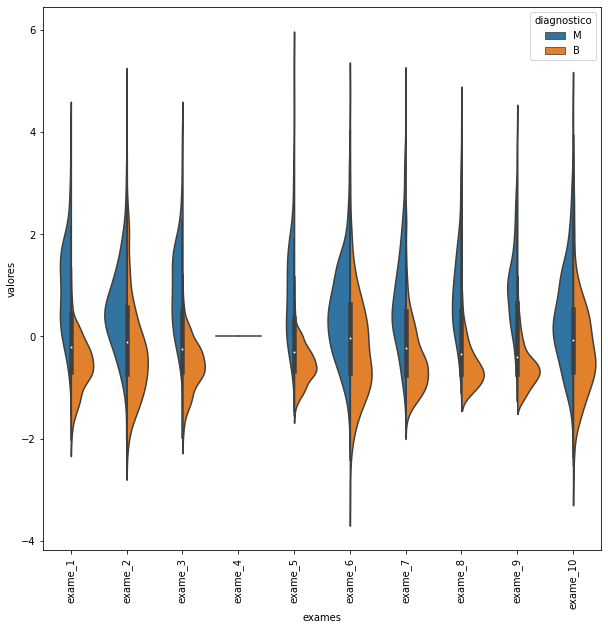

In [4]:
from sklearn.preprocessing import StandardScaler
padronizador = StandardScaler()
padronizador.fit(valores_exames_v1)
valores_exames_v2 = padronizador.transform(valores_exames_v1)
valores_exames_v2 = pd.DataFrame(data = valores_exames_v2, columns = valores_exames_v1.keys())

grafico_violino(valores_exames_v2, 0, 10)

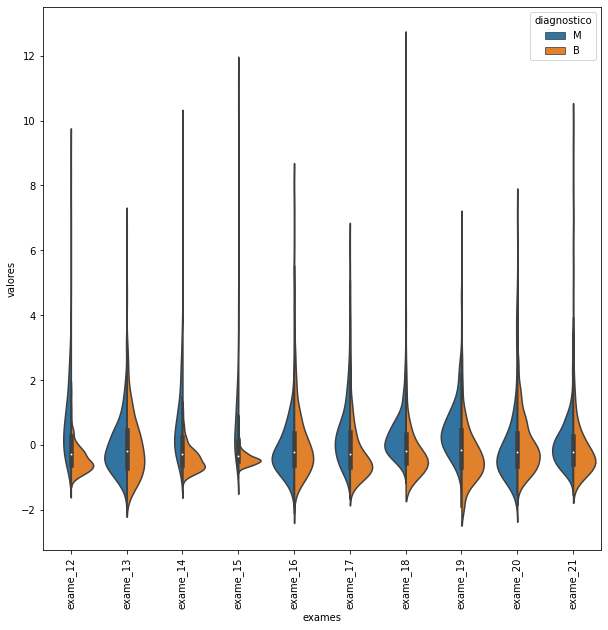

In [5]:
grafico_violino(valores_exames_v2, 11, 21)

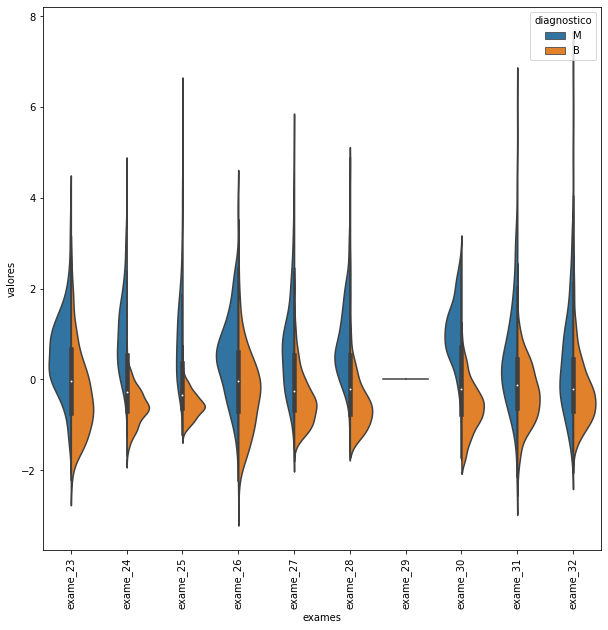

In [6]:
grafico_violino(valores_exames_v2, 22, 32)

In [7]:
valores_exames_v3 = valores_exames_v2.drop(columns= ["exame_4","exame_29"])

classificar(valores_exames_v3)

Acúracia da classificação de 92.40%
